In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
from scipy import signal, interpolate
import numpy as np

In [2]:
source_path = r"C:\Users\joses\Mi unidad\TRABAJO\49_profile_estimation\TRABAJO\experimental\2229-2023-09-24_17-01-55"

# Data Extraction

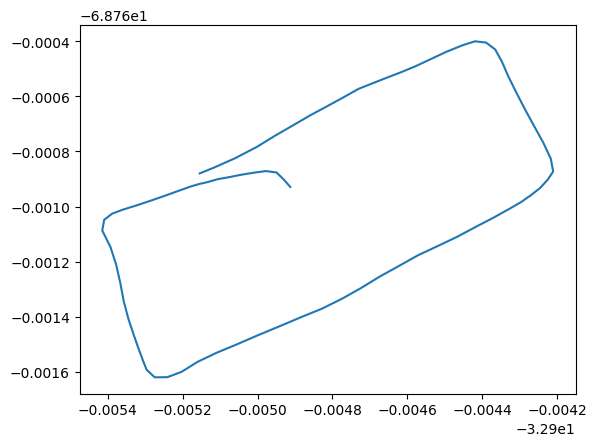

In [3]:
fs_acc = 100 # sps

i_ini, i_fin = 0, 80 # s
acc_orig_df_1 = pd.read_csv(path.join(source_path, "AccelerometerUncalibrated.csv")).iloc[i_ini*fs_acc:i_fin*fs_acc, :].reset_index()
loc_orig_df_1 = pd.read_csv(path.join(source_path, "Location.csv")).iloc[i_ini:i_fin, :].reset_index()
plt.plot(loc_orig_df_1['latitude'], loc_orig_df_1['longitude'])

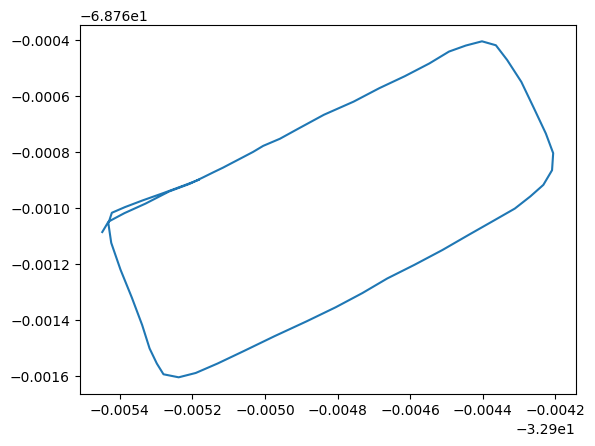

In [4]:
i_ini, i_fin = 80, 140 # s
acc_orig_df_2 = pd.read_csv(path.join(source_path, "AccelerometerUncalibrated.csv")).iloc[i_ini*fs_acc:i_fin*fs_acc, :].reset_index()
loc_orig_df_2 = pd.read_csv(path.join(source_path, "Location.csv")).iloc[i_ini:i_fin, :].reset_index()
plt.plot(loc_orig_df_2['latitude'], loc_orig_df_2['longitude'])

## Raw Visualization

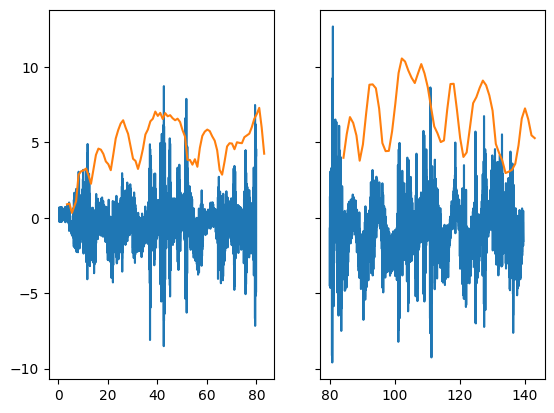

In [5]:
fig, ax = plt.subplots(1, 2, sharey='row')
ax[0].plot(acc_orig_df_1['seconds_elapsed'], acc_orig_df_1['z'])
ax[0].plot(loc_orig_df_1['seconds_elapsed'], loc_orig_df_1['speed'])
ax[1].plot(acc_orig_df_2['seconds_elapsed'], acc_orig_df_2['z'])
ax[1].plot(loc_orig_df_2['seconds_elapsed'], loc_orig_df_2['speed'])

# Feature extraction

In [6]:
def rms(arr):
    return np.sqrt(np.mean(arr**2))

acc_feat_df_1 = pd.DataFrame(data=np.vstack((acc_orig_df_1['seconds_elapsed'].values, acc_orig_df_1['z'].rolling(100).apply(rms).values)).T, 
                             columns=['seconds_elapsed', 'z_rolling_rms'])
acc_feat_df_1.reset_index(inplace=True)
acc_feat_df_2 = pd.DataFrame(data=np.vstack((acc_orig_df_2['seconds_elapsed'].values, acc_orig_df_2['z'].rolling(100).apply(rms).values)).T, 
                             columns=['seconds_elapsed', 'z_rolling_rms'])
acc_feat_df_2.reset_index(inplace=True)


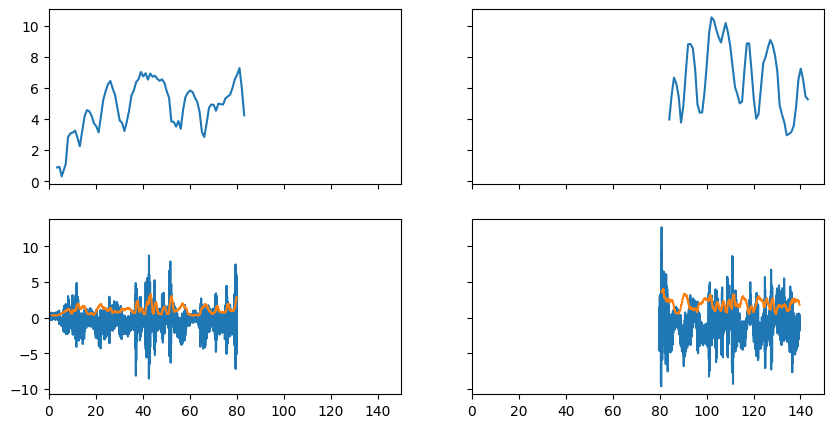

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5), sharex='all', sharey='row')
ax[0,0].plot(loc_orig_df_1['seconds_elapsed'], loc_orig_df_1['speed'])
ax[1,0].plot(acc_orig_df_1['seconds_elapsed'], acc_orig_df_1['z'])
ax[1,0].plot(acc_feat_df_1['seconds_elapsed'], acc_feat_df_1['z_rolling_rms'])
# ax[1,0].set_xlim([0, 200])
ax[0,1].plot(loc_orig_df_2['seconds_elapsed'], loc_orig_df_2['speed'])
ax[1,1].plot(acc_orig_df_2['seconds_elapsed'], acc_orig_df_2['z'])
ax[1,1].plot(acc_feat_df_2['seconds_elapsed'], acc_feat_df_2['z_rolling_rms'])
ax[1,1].set_xlim([0, 150])
plt.show()


### Scatter analysis

#### Low frequency

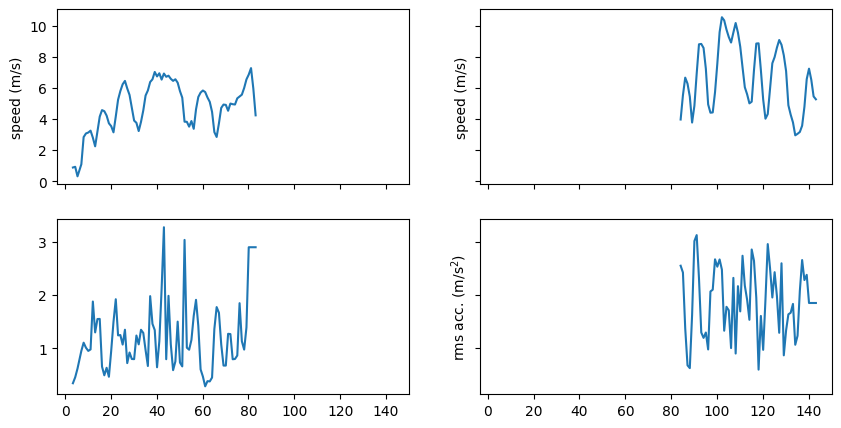

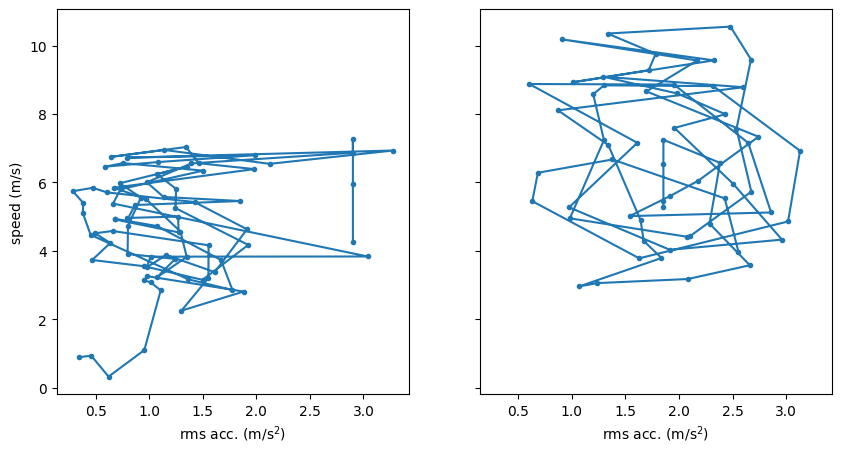

In [8]:
features_lf_1 = loc_orig_df_1.loc[:,:]
features_lf_1['z_rolling_rms'] = np.interp(x=loc_orig_df_1['seconds_elapsed'], xp=acc_feat_df_1['seconds_elapsed'].values, fp=acc_feat_df_1['z_rolling_rms'])
features_lf_1.reset_index(inplace=True)
features_lf_2 = loc_orig_df_2.loc[:,:]
features_lf_2['z_rolling_rms'] = np.interp(x=loc_orig_df_2['seconds_elapsed'], xp=acc_feat_df_2['seconds_elapsed'].values, fp=acc_feat_df_2['z_rolling_rms'])
features_lf_2.reset_index(inplace=True)

fig, ax = plt.subplots(2, 2, figsize=(10, 5), sharex='all', sharey='row')
ax[0,0].plot(features_lf_1['seconds_elapsed'], features_lf_1['speed'])
ax[0,0].set_ylabel('speed (m/s)')
ax[1,0].plot(features_lf_1['seconds_elapsed'], features_lf_1['z_rolling_rms'])
ax[1,1].set_ylabel('rms acc. (m/s$^2$)')
ax[0,1].plot(features_lf_2['seconds_elapsed'], features_lf_2['speed'])
ax[0,1].set_ylabel('speed (m/s)')
ax[1,1].plot(features_lf_2['seconds_elapsed'], features_lf_2['z_rolling_rms'])
# ax[1,0].set_ylabel('rms acc. (m/s$^2$)')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex='all', sharey='row')
ax[0].plot(features_lf_1['z_rolling_rms'], features_lf_1['speed'], linestyle='-', marker='.')
ax[0].set_xlabel('rms acc. (m/s$^2$)')
ax[0].set_ylabel('speed (m/s)')
ax[1].plot(features_lf_2['z_rolling_rms'], features_lf_2['speed'], linestyle='-', marker='.')
ax[1].set_xlabel('rms acc. (m/s$^2$)')
plt.show()

#### High frequency

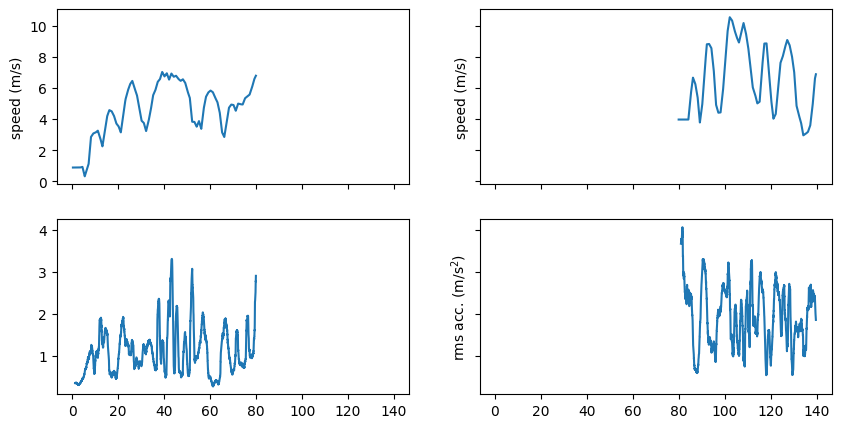

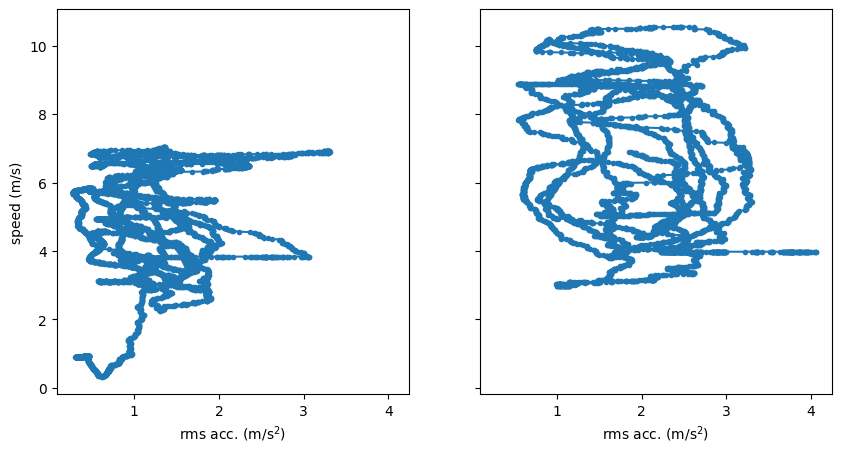

In [9]:

features_hf_1 = acc_feat_df_1.loc[:,:]
features_hf_1['speed'] = np.interp(x=acc_feat_df_1['seconds_elapsed'], xp=loc_orig_df_1['seconds_elapsed'].values, fp=loc_orig_df_1['speed'])

features_hf_2 = acc_feat_df_2.loc[:,:]
features_hf_2['speed'] = np.interp(x=acc_feat_df_2['seconds_elapsed'], xp=loc_orig_df_2['seconds_elapsed'].values, fp=loc_orig_df_2['speed'])


fig, ax = plt.subplots(2, 2, figsize=(10, 5), sharex='all', sharey='row')
ax[0,0].plot(features_hf_1['seconds_elapsed'], features_hf_1['speed'])
ax[0,0].set_ylabel('speed (m/s)')
ax[1,0].plot(features_hf_1['seconds_elapsed'], features_hf_1['z_rolling_rms'])
ax[1,1].set_ylabel('rms acc. (m/s$^2$)')
ax[0,1].plot(features_hf_2['seconds_elapsed'], features_hf_2['speed'])
ax[0,1].set_ylabel('speed (m/s)')
ax[1,1].plot(features_hf_2['seconds_elapsed'], features_hf_2['z_rolling_rms'])
# ax[1,0].set_ylabel('rms acc. (m/s$^2$)')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex='all', sharey='row')
ax[0].plot(features_hf_1['z_rolling_rms'], features_hf_1['speed'], linestyle='-', marker='.')
ax[0].set_xlabel('rms acc. (m/s$^2$)')
ax[0].set_ylabel('speed (m/s)')
ax[1].plot(features_hf_2['z_rolling_rms'], features_hf_2['speed'], linestyle='-', marker='.')
ax[1].set_xlabel('rms acc. (m/s$^2$)')
plt.show()



### Location matching

In [10]:
from geopy import distance

# time matching
time_matches = {}
for index, row in loc_orig_df_1.iterrows():
    lat_lon = np.array([row['latitude'], row['longitude']])
    min_dist = (np.inf, np.nan)
    for index_, row_ in loc_orig_df_2.iterrows():
        lat_lon_ = np.array([row_['latitude'], row_['longitude']])
        if index != index_:
            dist = distance.distance(lat_lon, lat_lon_).km
            if dist < min_dist[0]:
                min_dist = (dist, row_['seconds_elapsed'])
    time_matches.update({row['seconds_elapsed']: min_dist[1]})

time_matches_dict = dict(time_matches)


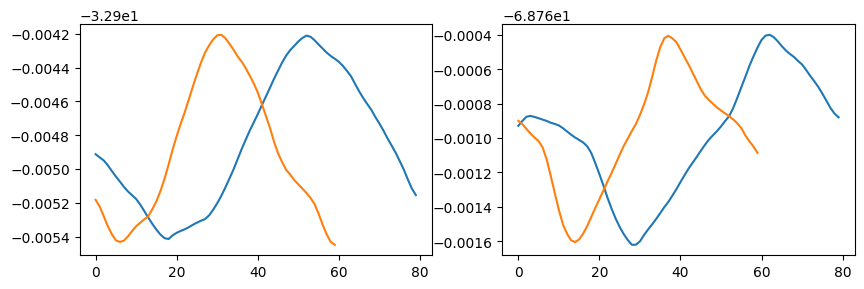

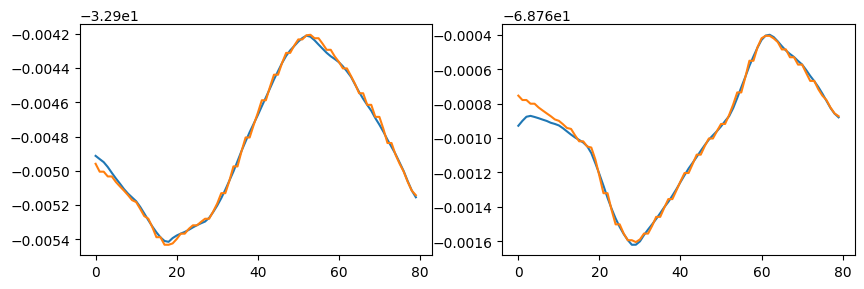

In [11]:
# location matching
loc_orig_df_2_matched = loc_orig_df_1.copy()
for index, row in loc_orig_df_1.iterrows():
    seconds_elapsed_1 = row['seconds_elapsed']
    if index == len(loc_orig_df_2_matched):
        break
    loc_orig_df_2_matched.iloc[index] = loc_orig_df_2.loc[loc_orig_df_2['seconds_elapsed'] == time_matches_dict[seconds_elapsed_1]].values[0]
    
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(loc_orig_df_1['latitude'].values)
ax[0].plot(loc_orig_df_2['latitude'].values)
ax[1].plot(loc_orig_df_1['longitude'].values)
ax[1].plot(loc_orig_df_2['longitude'].values)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(loc_orig_df_1['latitude'].values)
ax[0].plot(loc_orig_df_2_matched['latitude'].values)
ax[1].plot(loc_orig_df_1['longitude'].values)
ax[1].plot(loc_orig_df_2_matched['longitude'].values)

# Training

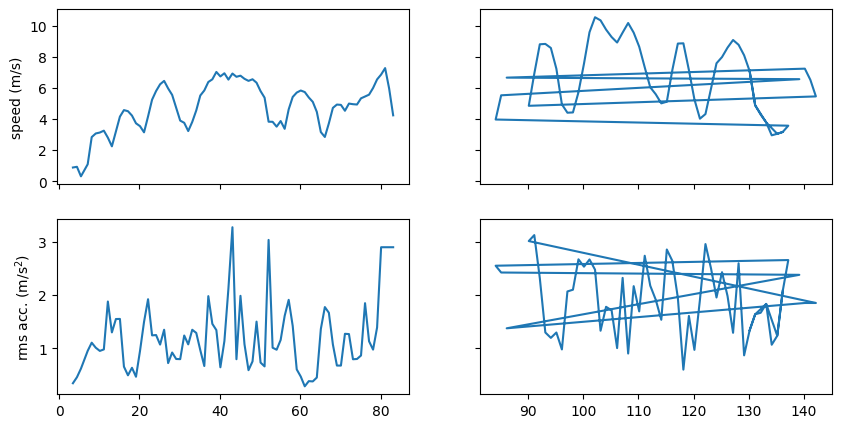

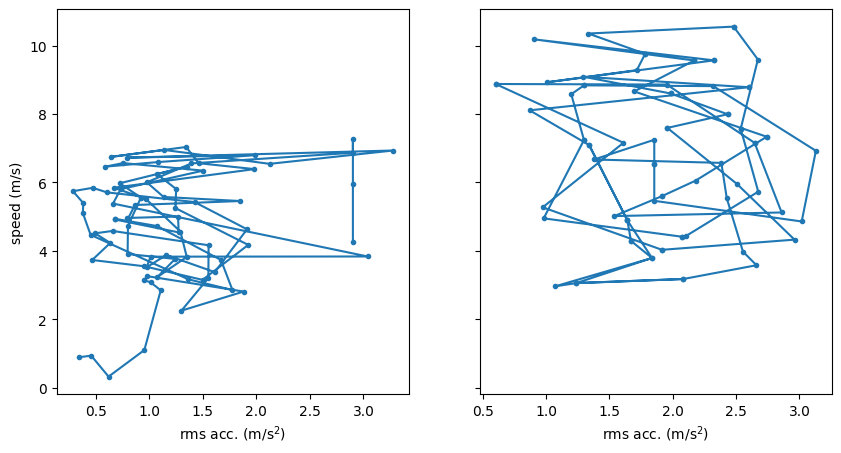

In [12]:
# feature matching
features_lf_2_matched = features_lf_1.copy()
for index, row in features_lf_1.iterrows():
    seconds_elapsed_1 = row['seconds_elapsed']
    features_lf_2_matched.iloc[index] = features_lf_2.loc[features_lf_2['seconds_elapsed'] == time_matches_dict[seconds_elapsed_1]].values[0]

fig, ax = plt.subplots(2, 2, figsize=(10, 5), sharex='col', sharey='row')
ax[0,0].plot(features_lf_1['seconds_elapsed'], features_lf_1['speed'])
ax[0,0].set_ylabel('speed (m/s)')
ax[1,0].plot(features_lf_1['seconds_elapsed'], features_lf_1['z_rolling_rms'])
# ax[1,1].set_ylabel('rms acc. (m/s$^2$)')
ax[0,1].plot(features_lf_2_matched['seconds_elapsed'], features_lf_2_matched['speed'])
# ax[0,1].set_ylabel('speed (m/s)')
ax[1,1].plot(features_lf_2_matched['seconds_elapsed'], features_lf_2_matched['z_rolling_rms'])
ax[1,0].set_ylabel('rms acc. (m/s$^2$)')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex='col', sharey='row')
ax[0].plot(features_lf_1['z_rolling_rms'], features_lf_1['speed'], linestyle='-', marker='.')
ax[0].set_xlabel('rms acc. (m/s$^2$)')
ax[0].set_ylabel('speed (m/s)')
ax[1].plot(features_lf_2_matched['z_rolling_rms'], features_lf_2_matched['speed'], linestyle='-', marker='.')
ax[1].set_xlabel('rms acc. (m/s$^2$)')
plt.show()

#### Datasets

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

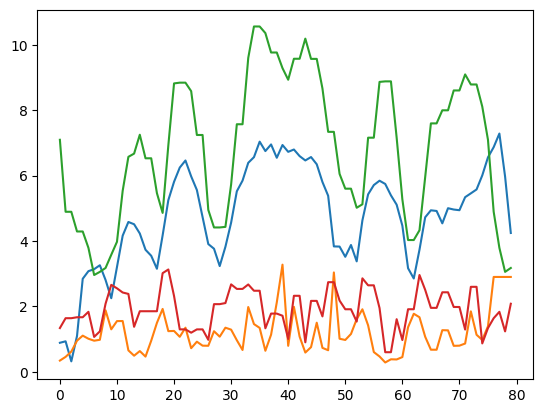

In [14]:
X = np.array([features_lf_1.loc[:, 'speed'].values, features_lf_1.loc[:, 'z_rolling_rms'].values, 
              features_lf_2_matched.loc[:, 'speed'].values, features_lf_2_matched.loc[:, 'z_rolling_rms'].values]).T
plt.plot(X)
plt.show()

X_train, X_test = train_test_split(X, test_size=0.2)
y_train = np.zeros((X_train.shape[0], 1))

## Verification dataset

(1200, 4)


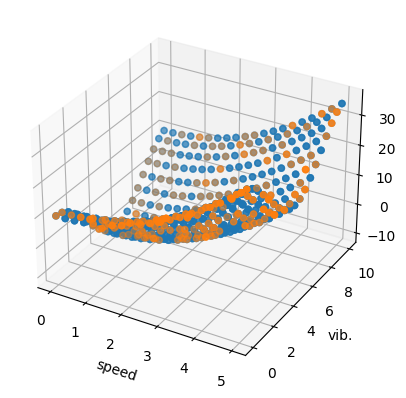

(array([340.,   0.,   0.,   0.,   0., 270.,   0.,   0.,   0., 350.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

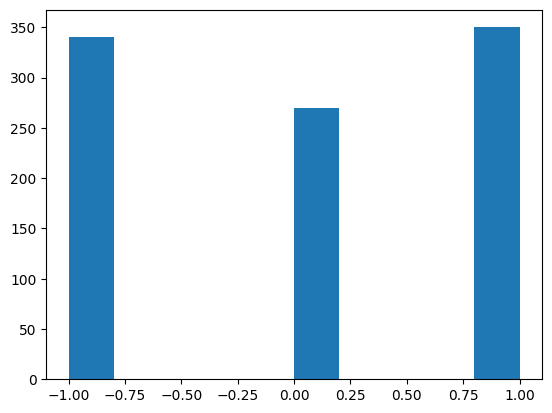

In [15]:
x1, x2 = np.meshgrid(np.linspace(0., 5., 20), np.linspace(0.,10.,20))
x1, x2 = np.ravel(x1), np.ravel(x2)

x1, x2 = np.hstack([x1, x1, x1]), np.hstack([x2, x2, x2])

def f(x12):
    return x12[0]**2 + 10*np.cos(x12[1]*.6)


rng1 = np.random.default_rng()
x1_, x2_ = x1.copy(), x2.copy()
rng1.shuffle(x1_), rng1.shuffle(x2_)

# print(x1, x2)
# print(x1_, x2_)

X = np.array([x1, x2, x1_, x2_]).T
print(X.shape)

y = []
tol = 5.
for x in X:
    if f(x[:2]) > f(x[2:]) + tol:
        y.append(1.)
    elif f(x[:2]) < f(x[2:]) - tol:
        y.append(-1.)
    else:
        y.append(0.)
y = np.array(y).reshape((-1,1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], np.apply_along_axis(f,1,X_train[:,:2]))
ax.scatter(X_test[:, 0], X_test[:, 1], np.apply_along_axis(f,1,X_test[:,:2]))
ax.set_xlabel('speed')
ax.set_ylabel('vib.')
plt.show()

plt.hist(y_train)


### Model definition

In [16]:
import keras

x1_nn_input = keras.layers.Input(shape=(2,))
x2_nn_input = keras.layers.Input(shape=(2,))

activation = 'tanh'
reg = None
dropout = 0.0
shared_layers = [keras.layers.Dense(64, activation=activation, kernel_regularizer=reg, bias_regularizer=reg, activity_regularizer=reg),
                 keras.layers.Dropout(dropout),
                 keras.layers.BatchNormalization(),
                 keras.layers.Dense(32, activation=activation, kernel_regularizer=reg, bias_regularizer=reg, activity_regularizer=reg),
                 keras.layers.Dropout(dropout),
                 keras.layers.BatchNormalization(),
                 keras.layers.Dense(16, activation=activation, kernel_regularizer=reg, bias_regularizer=reg, activity_regularizer=reg),
                 keras.layers.Dropout(dropout),
                 keras.layers.BatchNormalization(),
                 keras.layers.Dense(8, activation=activation, kernel_regularizer=reg, bias_regularizer=reg, activity_regularizer=reg),
                 keras.layers.Dropout(dropout),
                 keras.layers.BatchNormalization(),
                 keras.layers.Dense(4, activation=activation, kernel_regularizer=reg, bias_regularizer=reg, activity_regularizer=reg),
                 keras.layers.Dropout(dropout),
                 keras.layers.BatchNormalization(),
                 keras.layers.Dense(1, activation=activation, kernel_regularizer=reg, bias_regularizer=reg, activity_regularizer=reg)]
first = True
for layer in shared_layers:
    if first:
        x1_nn = layer(x1_nn_input)
        x2_nn = layer(x2_nn_input)
        first = False    
    else:
        x1_nn = layer(x1_nn)
        x2_nn = layer(x2_nn)

y_nn = keras.layers.Lambda(lambda x12: keras.backend.tanh(x12[0] - x12[1]), name='ranker')((x1_nn, x2_nn))

model = keras.models.Model(inputs=[x1_nn_input, x2_nn_input], outputs=[y_nn])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 64)                   192       ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 64)                   0         ['dense[0][0]',           

In [17]:
model_x1 = keras.models.Model(inputs=[x1_nn_input], outputs=[x1_nn])
model_x1.build(input_shape=x1_nn_input.shape)
# model_x1.summary()

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 1.3409 - val_loss: 0.5248 - lr: 0.0500
Epoch 2/1000
1/1 [==============================] - 0s 76ms/step - loss: 0.7281 - val_loss: 0.4968 - lr: 0.0500
Epoch 3/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.3897 - val_loss: 0.4842 - lr: 0.0500
Epoch 4/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.3503 - val_loss: 0.4793 - lr: 0.0500
Epoch 5/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.3188 - val_loss: 0.4696 - lr: 0.0500
Epoch 6/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.2979 - val_loss: 0.4579 - lr: 0.0500
Epoch 7/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.2832 - val_loss: 0.4463 - lr: 0.0500
Epoch 8/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.2745 - val_loss: 0.4297 - lr: 0.0500
Epoch 9/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.2631 - val_loss: 0.4312 - lr: 0

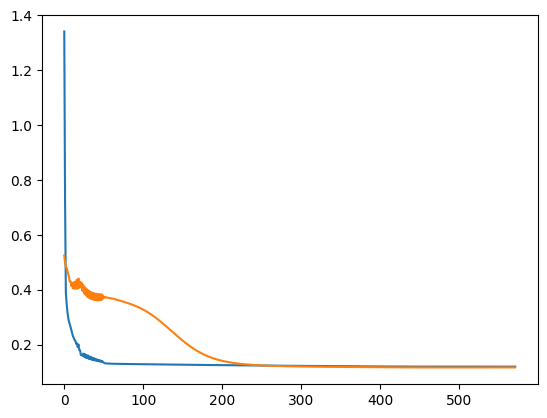

In [18]:
learning_rate = .05
batch_size = X_train.shape[0]
epochs = 1000
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7,
                                              patience=5, verbose=1,min_lr=0)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100,)

model.compile(optimizer=keras.optimizers.SGD(learning_rate=learning_rate), loss='mse')
history = model.fit(x=[X_train[:, :2], X_train[:, 2:]], y=[y_train], batch_size=batch_size, epochs=epochs, validation_split=0.10,
                    callbacks=[reduce_lr, early_stopping])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

### Test

In [19]:
y_train_pred = model.predict([X_train[:, :2], X_train[:, 2:]])

y_test_pred = model.predict([X_test[:, :2], X_test[:, 2:]])



8/8 [==============================] - 0s 3ms/step


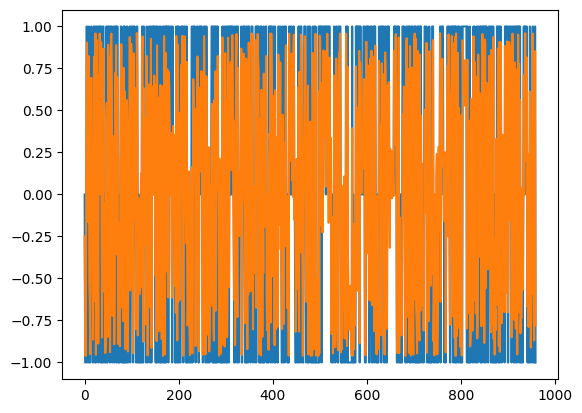

In [20]:
plt.plot(np.hstack((y_train, y_train_pred)))
plt.show()


In [21]:
import plotly.graph_objects as go

x1_nn_train_pred = model_x1.predict([X_train[:, :2]])
fig1 = go.Figure(data=go.Scatter3d(
    x=X_train[:, 0],
    y=X_train[:, 1],
    z=x1_nn_train_pred[:,0],
    mode='markers',
    marker=dict(
        size=5  # Adjust the marker size as needed
    )
))

x1_nn_test_pred = model_x1.predict([X_test[:, :2]])
fig1.add_trace(go.Scatter3d(
    x=X_test[:, 0],
    y=X_test[:, 1],
    z=x1_nn_test_pred[:,0],
    mode='markers',
    marker=dict(
        size=5  # Adjust the marker size as needed
    )
))
fig1.show()


def f_vec(X):
    res = []
    for x in X:
        res.append(f(x))
    return np.array(res)

f_true = f_vec(X[:, :2])

fig2 = go.Figure(data=go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=f_true,
    mode='markers',
    marker=dict(
        size=5  # Adjust the marker size as needed
    )
))
fig2.show()


f_adap = ((f_true - np.mean(f_true))/np.std(f_true)) * np.std(x1_nn_train_pred) + np.mean(x1_nn_train_pred)

layout = go.Layout(
    width=800,  # Width in pixels
    height=600  # Height in pixels
)
x1_nn_train_pred = model_x1.predict([X_train[:, :2]])
fig3 = go.Figure(data=go.Scatter3d(
    x=X_train[:, 0],
    y=X_train[:, 1],
    z=x1_nn_train_pred[:,0],
    mode='markers',
    marker=dict(
        size=5  # Adjust the marker size as needed
    )),
    layout=layout)

x1_nn_test_pred = model_x1.predict([X_test[:, :2]])
fig3.add_trace(go.Scatter3d(
    x=X_test[:, 0],
    y=X_test[:, 1],
    z=x1_nn_test_pred[:,0],
    mode='markers',
    marker=dict(
        size=5  # Adjust the marker size as needed
    )
))

fig3.add_trace(go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=f_adap,
    mode='markers',
    marker=dict(
        size=5  # Adjust the marker size as needed
    )
))
fig3.show()

8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 3ms/step
